In [1]:
! pip install pandas-datareader

In [2]:
import pandas_datareader as web
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
def get_dates(data_window):
    '''
    Returns the start date and end date for given number of years

    Parameters:
    data_window (int): number of years of past data

    Returns:
    start_date (datetime): start date
    end_date (datetime): today's date
    '''
    end_date = pd.to_datetime(date.today())
    start_date = pd.to_datetime(
        date.today() + relativedelta(years=-data_window))

    return start_date, end_date

In [4]:
data_window = 1  # look at last 1 year of data
start_date, end_date = get_dates(data_window)
stock = 'SPY'  # stock symbol

In [5]:
# get stock data and take a look at it
df = web.DataReader(stock, data_source='yahoo',
                    start=start_date, end=end_date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-16,256.899994,237.360001,241.179993,239.850006,297240000.0,235.452972
2020-03-17,256.170013,237.070007,245.039993,252.800003,262070500.0,248.165558
2020-03-18,248.369995,228.020004,236.250000,240.000000,327597100.0,235.600204
2020-03-19,247.380005,232.220001,239.250000,240.509995,289322000.0,236.100845
2020-03-20,244.470001,228.500000,242.529999,228.800003,347158800.0,225.926285
...,...,...,...,...,...,...
2021-03-08,387.679993,381.420013,384.660004,381.720001,122957100.0,381.720001
2021-03-09,389.910004,385.309998,385.850006,387.170013,113457800.0,387.170013
2021-03-10,391.399994,388.170013,389.690002,389.579987,109660800.0,389.579987


In [6]:
# df stats
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,336.114701,330.678646,333.518645,333.530439,9.180746e+07,331.505351
std,38.528699,40.142884,39.540313,39.364526,5.416116e+07,40.525630
min,229.679993,218.259995,228.190002,222.949997,2.645790e+07,220.149750
25%,311.470001,305.815002,309.705002,308.500000,5.762450e+07,305.965775
50%,338.739990,334.869995,336.709991,336.839996,7.573800e+07,334.459778
75%,369.309998,365.214996,367.360001,367.044998,1.072220e+08,366.266434
max,395.649994,391.739990,393.959991,394.059998,3.471588e+08,394.059998


In [7]:
# check for null values
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

Text(0.5, 1.0, 'SPY')

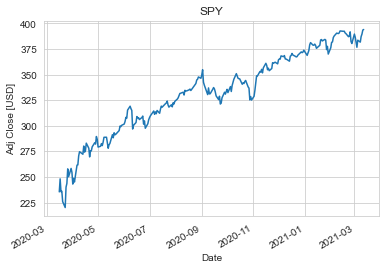

In [8]:
# plot adjusted close
sns.set_style('whitegrid')
df['Adj Close'].plot()
plt.xlabel('Date')
plt.ylabel('Adj Close [USD]')
plt.title(stock)